In [154]:
import networkx as nx
import random
import math
import community

def Leiden(G, num_communities = None):
    P = community.best_partition(G) 
    done = False
    max_iterations = 100 
    iterations = 0

    while not done and iterations < max_iterations:
        P, done = MoveNodesFast(G, P)  

        if not done:
            P = RefinePartition(G, P, 1)  
            G = AggregateGraph(G, P)  

        iterations += 1

    P = getDesiredCommunities(P, num_communities)  

    return P

def MoveNodesFast(G, P):
    Q = list(G.nodes()) 
    random.shuffle(Q)
    done = True

    while Q:
        v = Q.pop() 

        if v not in P:
            C0 = max(P, key=lambda C: DeltaHP(G, v, P[C]))  
            if DeltaHP(G, v, P[C0]) > 0: 
                P[v] = C0
                done = False
                neighbors = list(G.neighbors(v))  
                for u in neighbors:
                    if u not in P:  
                        Q.append(u)  

    return P, done

def RefinePartition(G, P):
    Prefined = SingletonPartition(G)  
    for C in P:  
        Prefined = MergeNodesSubset(G, Prefined, C)
 
    return Prefined

def MergeNodesSubset(G, P, S, gamma=0.5):
    R = [v for v in S if E(G, v, set(S) - {v}) >= gamma * k(G, v) * (k(G, S) - k(G, v))]
 
    random.shuffle(R)
    for v in R:  
        if IsSingletonCommunity(v, P): 
            T = [C for C in P if C.issubset(S) and E(G, C, S - C) >= gamma * k(G, C) * (k(G, S) - k(G, C))]  
            C0 = random.choice(T) if T else None  
            if C0 is not None and DeltaHP(G, v, P[C0]) > 0:  
                P[v] = C0

    return P


def IsSingletonCommunity(v, P):
    return v in P and len(P[v]) == 1

def SingletonPartition(G):
    return {v: {v} for v in G.nodes()}  

def E(G, u, V):
    return len(set(G[u]) & V)  

def k(G, V):
    return sum([len(G[u]) for u in V])  
def DeltaHP(G, v, C):
    return (2 * E(G, v, C) - k(G, C) * k(G, {v})) / (2 * G.number_of_edges()) 
def AggregateGraph(G, P):
    Cmap = {} 
    for u, v in G.edges():
        if u in P and v in P:  
            Cu = P[u]
            Cv = P[v]  
            if Cu != Cv:   
                if Cu not in Cmap:  
                    Cmap[Cu] = set()  
                if Cv not in Cmap:   
                    Cmap[Cv] = set()   
                Cmap[Cu].add(Cv)   
                Cmap[Cv].add(Cu)   
    G_community = nx.Graph(Cmap)   
    return G_community

def getDesiredCommunities(P, num_communities):
    communities = set(P.values())
    sorted_communities = sorted(communities, key=lambda x: len([v for v in P if P[v] == x]), reverse=True)
    desired_communities = sorted_communities[:num_communities]

    new_P = {}
    for v in P:
        if P[v] in desired_communities:
            new_P[v] = P[v]

    return new_P



**Read G graph**

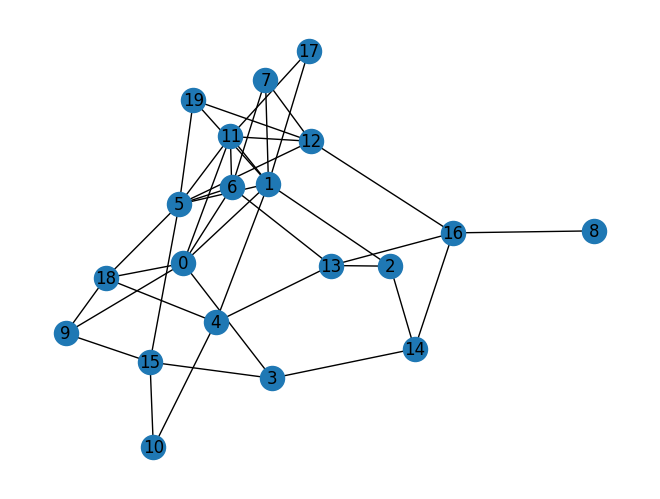

In [155]:
import networkx as nx
import pandas as pd

# Đọc tệp dữ liệu .mtx bằng pandas
# df = pd.read_csv('D:\MangXaHoi\soc-orkut\demo.mtx', sep=' ', skiprows=2, header=None)
# df.columns = ['row', 'col']
G = nx.Graph()

# Chuyển đổi thành đồ thị
#// Đồ thị data set
# G = nx.from_pandas_edgelist(df, 'row', 'col',create_using=nx.Graph)
#//Ví dụ demo
G = nx.gnm_random_graph(20, 40)
#// VÍ dụ 1
# G.add_nodes_from(['A','B','C','D','E','F'])
# G.add_edges_from([('A','B', {'weight': 1}),('A','C',{'weight': 1}),('B','C',{'weight': 1}),('C','D',{'weight': 1}),('D','E',{'weight': 1}),('D','F',{'weight': 1}),('E','F',{'weight': 1})])
#// VÍ dụ 2
# G.add_nodes_from([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
# G.add_edges_from([(1,2,{'weight': 1}),(1,4,{'weight': 1}),(1,7,{'weight': 1}),(0,2,{'weight': 1}),(0,4,{'weight': 1}),(0,5,{'weight': 1}),(0,3,{'weight': 1}),
#                   (2,4,{'weight': 1}),(2,5,{'weight': 1}),(2,6,{'weight': 1}),(3,7,{'weight': 1}),(4,10,{'weight': 1}),(5,7,{'weight': 1}),
#                   (5,11,{'weight': 1}),(6,7,{'weight': 1}),(6,11,{'weight': 1}),(8,15,{'weight': 1}),(8,11,{'weight': 1}),(8,9,{'weight': 1}),
#                   (8,10,{'weight': 1}),(9,12,{'weight': 1}),(9,14,{'weight': 1}),(10,13,{'weight': 1}),(10,12,{'weight': 1}),(10,14,{'weight': 1}),
#                   (11,13,{'weight': 1}), (11,10,{'weight': 1}),(8,14,{'weight': 1})])

#//Ví dụ 3
# G.add_nodes_from(['A','B','C','D','E','F'])
# G.add_edges_from([('A','B',{'weight': 5}), ('A','C',{'weight': 4}), ('A','E',{'weight': 1}), ('B','C',{'weight': 2}), ('C','D',{'weight': 7}), ('D','F',{'weight': 3}), ('E','F',{'weight': 8})])
#//Ví dụ 4
# G.add_nodes_from([1,2,3,4,5,6,7,8,9])
# G.add_edges_from([(1,2,{'weight': 1}), (1,3,{'weight': 1}), (1,4,{'weight': 1}), (2,3,{'weight': 1}), (3,4,{'weight': 1}), (4,5,{'weight': 1}),
#                   (4,6,{'weight': 1}), (5,6,{'weight': 1}), (5,7,{'weight': 1}), (5,8,{'weight': 1}), (6,7,{'weight': 1}), (6,8,{'weight': 1}),
#                   (7,8,{'weight': 1}), (7,9,{'weight': 1})])
nx.draw(G, with_labels=True)

# **Phase 1**

**result move node**

C:\Users\Admin\AppData\Local\Temp\ipykernel_8160\1929815343.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", num_communities)


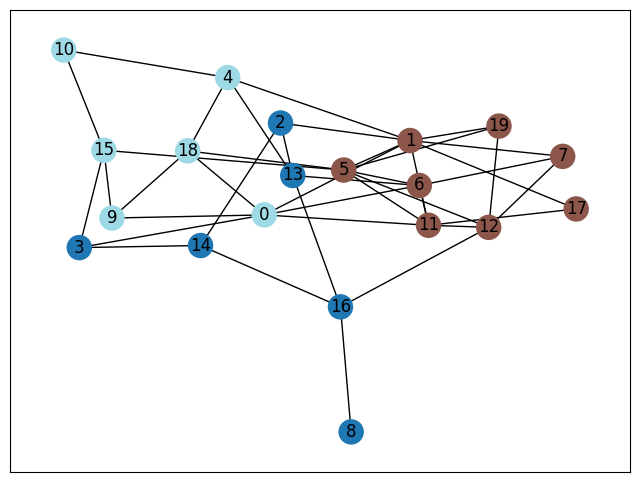

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Áp dụng thuật toán Leiden và lấy kết quả sau khi thực hiện xong bước Move Nodes
P=Leiden(G)
P, _ = MoveNodesFast(G, P)

# Tạo danh sách màu sắc cho các phân vùng
num_communities = max(P.values()) + 1
colors = plt.cm.get_cmap("tab20", num_communities)
plt.figure(figsize=(8, 6))  # Kích thước của figure
# Tạo danh sách màu sắc cho từng đỉnh dựa trên phân vùng
node_colors = [colors(community) for community in P.values()]

# Vẽ đồ thị với màu sắc cho từng đỉnh dựa trên phân vùng
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, node_color=node_colors, with_labels=True)
plt.show()

**Result refined**

C:\Users\Admin\AppData\Local\Temp\ipykernel_8160\836017822.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", num_communities)


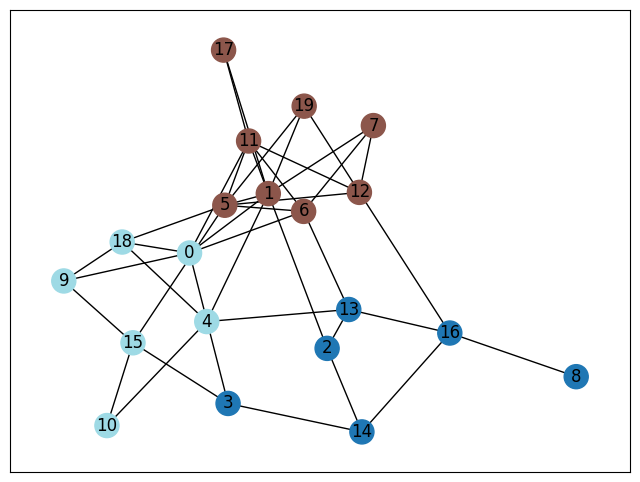

In [157]:
import matplotlib.pyplot as plt
import networkx as nx


done = False

P_before = P.copy()
P_after, done = MoveNodesFast(G, P)  # Di chuyển các nút giữa các cộng đồng
if not done:
    P_after = RefinePartition(G, P_after)  # Tinh chỉnh phân vùng P_after

# Tạo danh sách màu sắc cho các phân vùng sau khi tinh chỉnh
num_communities = max(P_after.values()) + 1
colors = plt.cm.get_cmap("tab20", num_communities)
plt.figure(figsize=(8, 6))  # Kích thước của figure
# Tạo danh sách màu sắc cho từng đỉnh dựa trên phân vùng sau khi tinh chỉnh
node_colors = []
changed_nodes = []

# Xác định những nút đã thay đổi và thay đổi màu sắc cho những nút đó
for node in G.nodes():
    if P_before[node] != P_after[node]:
        changed_nodes.append(node)
    node_colors.append(colors(P_before[node]))  

# Vẽ đồ thị với màu sắc cho từng đỉnh dựa trên phân vùng sau khi tinh chỉnh
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, node_color=node_colors, with_labels=True)
plt.show()


**Desired number of communities**

In [158]:
#tinh chỉnh số lượng cộng đồng cho phép tại đây
num_communities = 4
#
P = Leiden(G, num_communities)  # Gọi hàm Leiden để tạo phân vùng mới

for community_id in set(P.values()):
    nodes = [v for v in P if P[v] == community_id]
    print(f"Cộng đồng {community_id}: {nodes}")


Cộng đồng 0: [0, 4, 9, 10, 15, 18]
Cộng đồng 1: [1, 5, 6, 7, 11, 12, 17, 19]
Cộng đồng 2: [2, 3, 8, 13, 14, 16]


**Result**

C:\Users\Admin\AppData\Local\Temp\ipykernel_8160\272094677.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20c", num_communities)


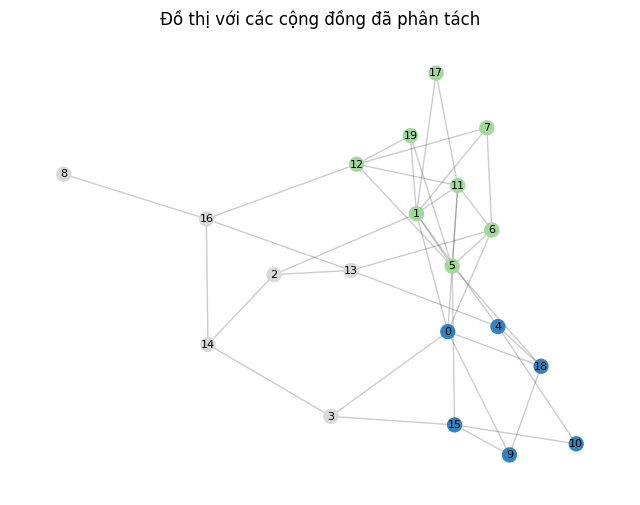

In [159]:
import networkx as nx
import matplotlib.pyplot as plt

# Tạo danh sách màu sắc cho các cộng đồng
G_community = AggregateGraph(G, P)

num_communities = len(set(P.values()))
colors = plt.cm.get_cmap("tab20c", num_communities)

# Vẽ đồ thị với màu sắc cho từng cộng đồng
pos = nx.spring_layout(G)  # Chọn layout cho đồ thị
plt.figure(figsize=(8, 6))  # Kích thước của figure

# Vẽ các cạnh của đồ thị
nx.draw_networkx_edges(G, pos, alpha=0.2)

# Vẽ các đỉnh của đồ thị với màu sắc tương ứng với cộng đồng (nếu có)
node_colors = [colors(P[node]) if node in P else 'gray' for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100)

# Hiển thị tên của các đỉnh
labels = {node: node for node in G.nodes()}  # Nhãn là tên của đỉnh
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.axis("off")  # Tắt trục tọa độ
plt.title("Đồ thị với các cộng đồng đã phân tách")
plt.show()
